In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate
np.random.seed(sum(map(ord, "aesthetics")))

print(sns.__version__)

0.7.1


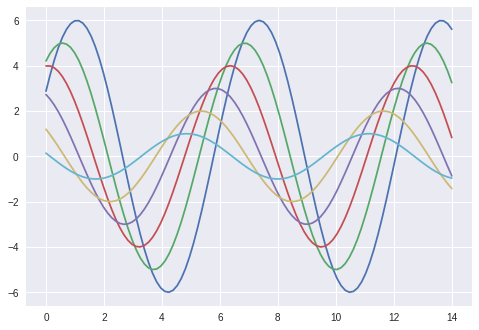

In [2]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
sinplot()

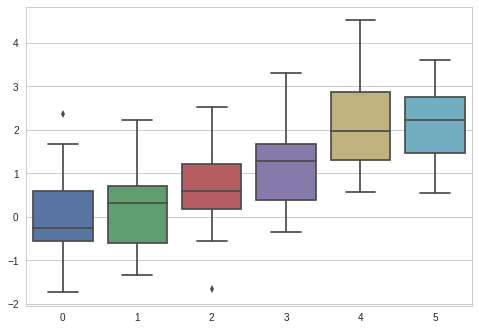

In [3]:
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data);

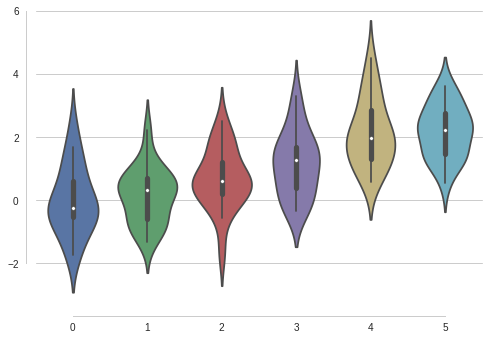

In [4]:
sns.violinplot(data=data)
sns.despine(offset=10, trim=True);

In [5]:
titanic = pd.read_csv('train.csv')
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


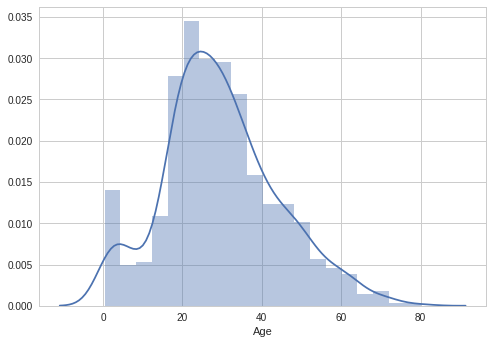

In [6]:
sns.distplot(titanic['Age'].dropna())

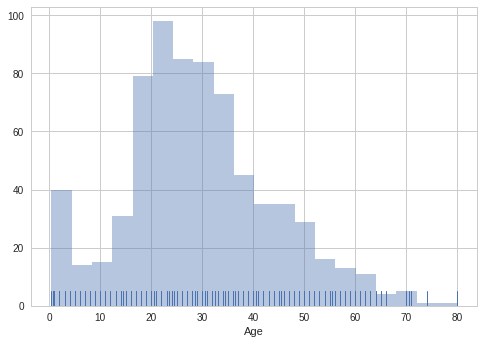

In [7]:
sns.distplot(titanic['Age'].dropna(), kde=False, rug=True)

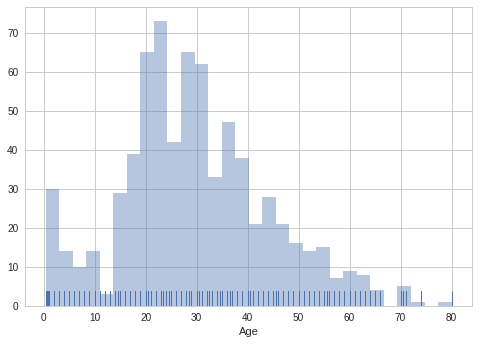

In [8]:
sns.distplot(titanic['Age'].dropna(), bins = 30, kde=False, rug=True)

## Drawing KDE (Kernel Density Estimation)

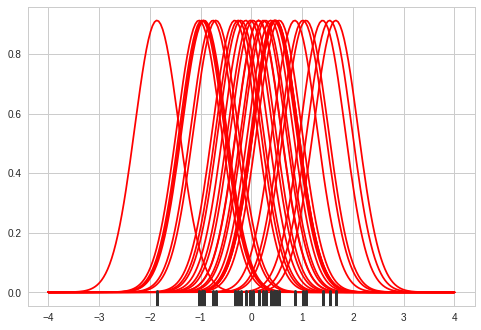

In [9]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

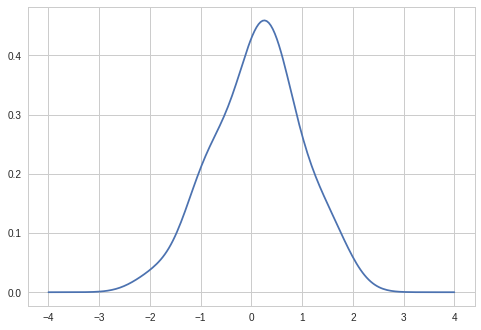

In [10]:
density = np.sum(kernels, axis=0)
density /= integrate.trapz(density, support)
plt.plot(support, density);

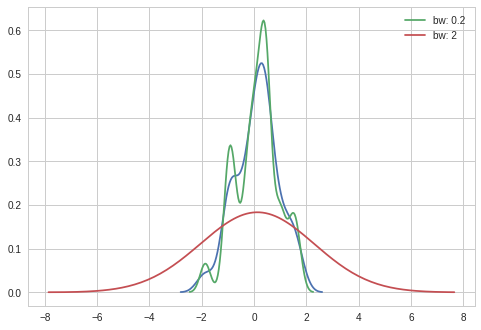

In [11]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();


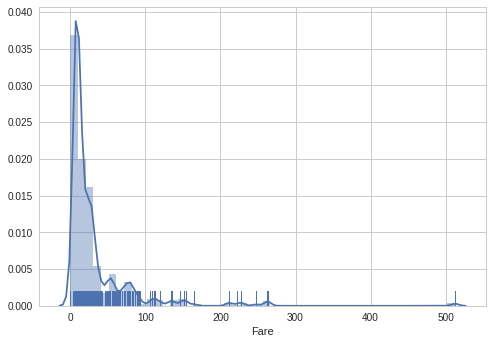

In [12]:
sns.distplot(titanic['Fare'].dropna(), kde=True, rug=True)

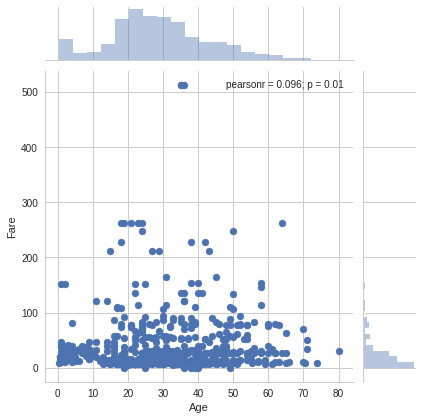

In [13]:
sns.jointplot(x="Age", y="Fare", data=titanic)

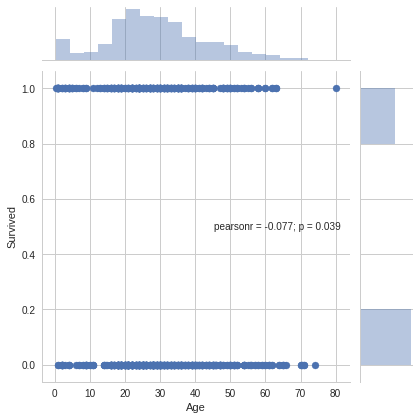

In [14]:
sns.jointplot(x="Age", y="Survived", data=titanic)

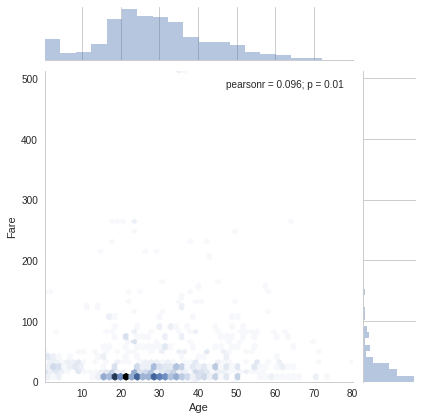

In [15]:
sns.jointplot(x="Age", y="Fare", kind="hex", data=titanic)

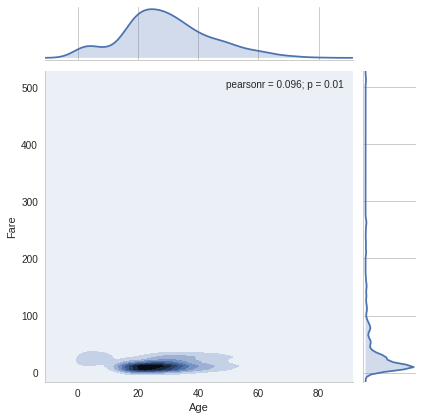

In [16]:
sns.jointplot(x="Age", y="Fare", data=titanic, kind="kde");

In [17]:
iris = sns.load_dataset("iris")
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


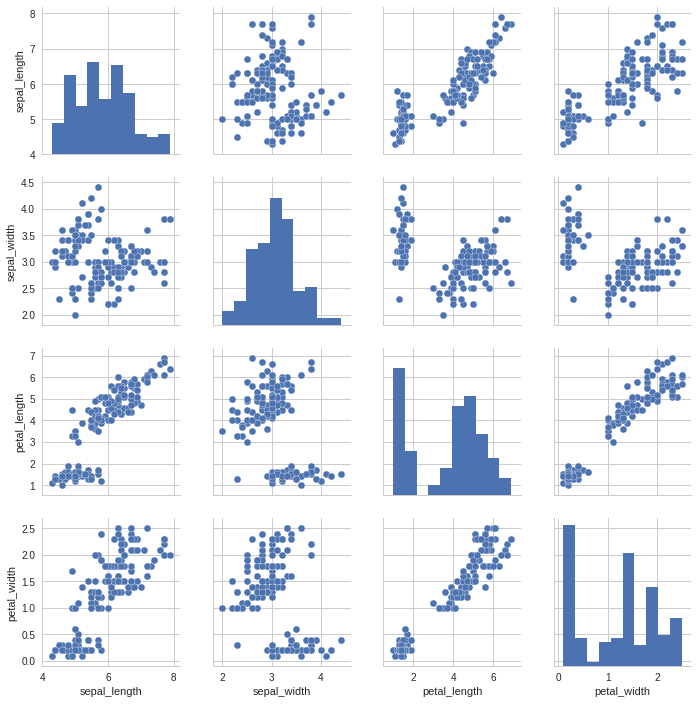

In [18]:
sns.pairplot(iris)

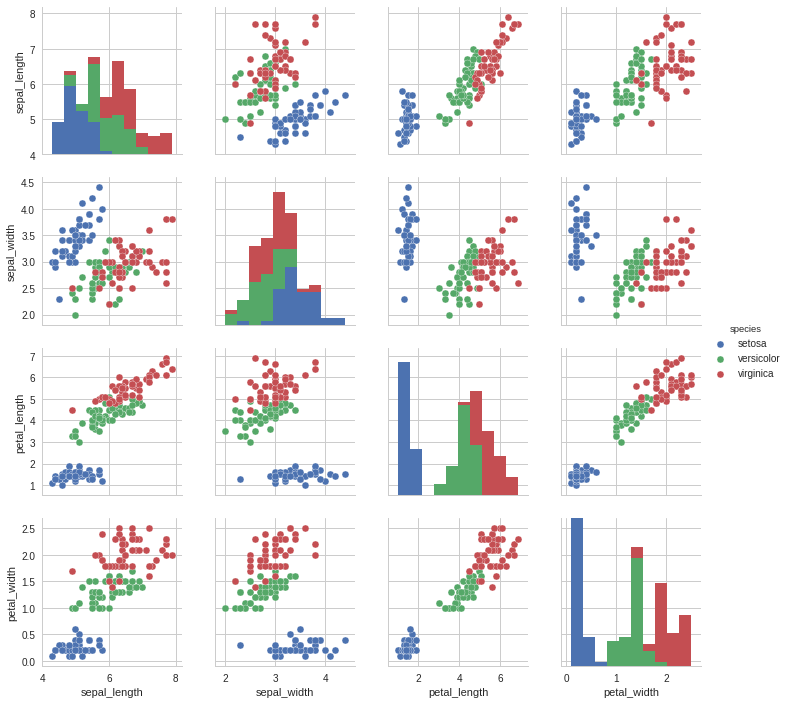

In [19]:
sns.pairplot(iris, hue="species")

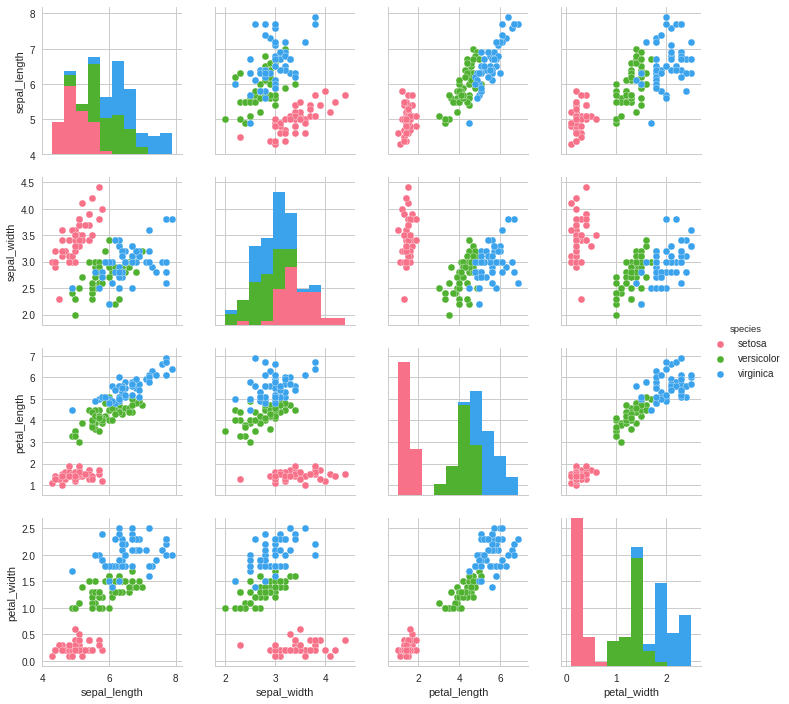

In [20]:
sns.pairplot(iris, hue="species", palette="husl")

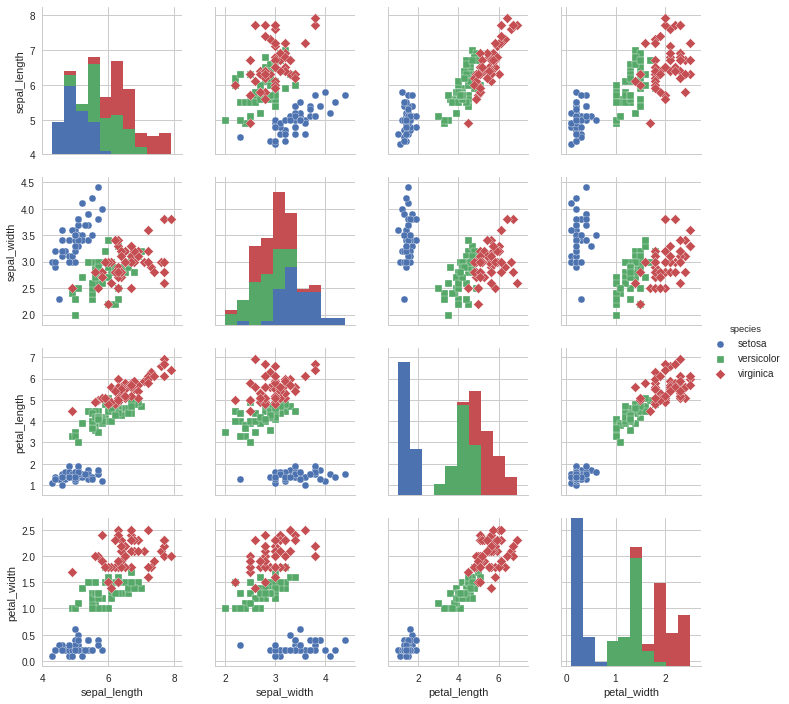

In [21]:
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])

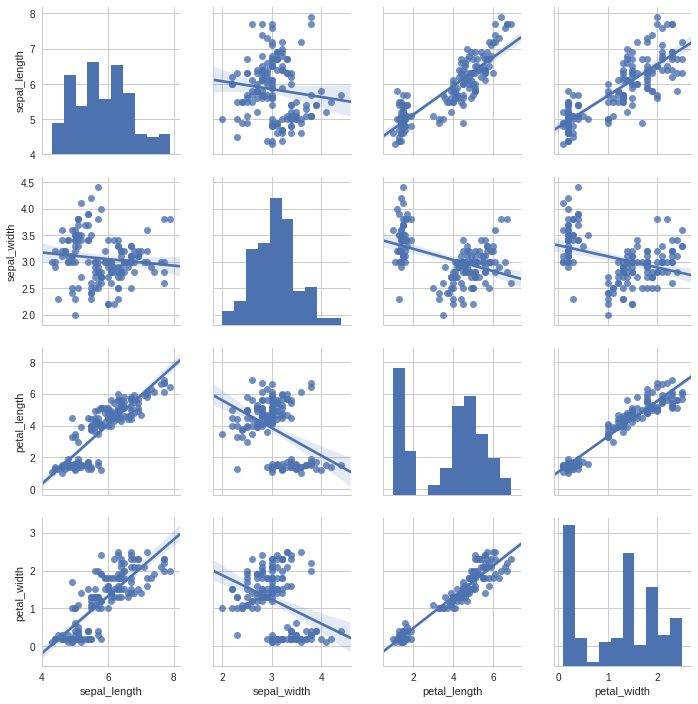

In [22]:
g = sns.pairplot(iris, kind="reg")

In [23]:
NYC_Sales = pd.read_csv('nyc_building_sales_short.csv')
NYC_Sales.describe()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (26,29,71) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Index,Block,Lot,SalePrice,LandSquareFeet,MarketValueSqFt,CD,CT2010,CB2010,...,TaxMap,APPBBL,PLUTOMapID,CurFvT,NewFvT,CuravtA,AssessmentValueSqFt,EstPriorMarketValueSqFt,EstCurentMarketValueSqFt,ValueRatio
count,9999.000000,9999.000000,9999.000000,9999.000000,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9978.000000,...,9993.000000,9.999000e+03,9999.000000,9.999000e+03,9.999000e+03,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000
mean,5068.875288,5135.073807,4185.731573,57.190519,1.415483e+06,3668.044304,375.033739,278.820182,420.873775,2088.191020,...,28335.924947,1.768787e+08,1.000800,7.690786e+05,8.868202e+05,1.159785e+05,16.108165,267.374803,308.704790,1.495555
std,2935.111687,2979.260570,1984.366083,125.333715,4.582109e+06,13456.748482,290.087894,46.482119,304.647949,1092.595277,...,4573.988902,6.604305e+08,0.028276,2.774273e+06,2.965009e+06,1.247975e+06,22.001803,172.522979,205.789593,1.294693
min,0.000000,0.000000,30.000000,1.000000,2.000000e+04,297.000000,4.219409,201.000000,1.000000,1000.000000,...,20901.000000,0.000000e+00,1.000000,0.000000e+00,3.700000e+04,0.000000e+00,0.000000,0.000000,17.299843,0.101833
25%,2513.500000,2535.500000,2728.000000,19.000000,4.500000e+05,1917.000000,191.302813,212.000000,206.000000,1003.000000,...,21801.000000,0.000000e+00,1.000000,4.110000e+05,4.490000e+05,1.928400e+04,8.689879,159.854725,176.250000,0.900000
50%,5076.000000,5146.000000,4205.000000,38.000000,7.250000e+05,2300.000000,300.925926,305.000000,363.000000,2001.000000,...,30706.000000,0.000000e+00,1.000000,5.350000e+05,6.140000e+05,2.609200e+04,12.634675,235.679214,266.190476,1.090982
75%,7619.500000,7735.500000,5629.000000,61.000000,1.230000e+06,3000.000000,472.695837,311.000000,528.000000,3000.000000,...,31702.000000,0.000000e+00,1.000000,7.800000e+05,9.100000e+05,3.843950e+04,17.124211,331.210599,386.207970,1.523533
max,10130.000000,10263.000000,7965.000000,4336.000000,1.690000e+08,829300.000000,5101.910828,318.000000,1522.000000,7003.000000,...,32401.000000,3.078710e+09,2.000000,1.850450e+08,1.953890e+08,8.327025e+07,721.636364,2595.380435,2097.142857,9.906977


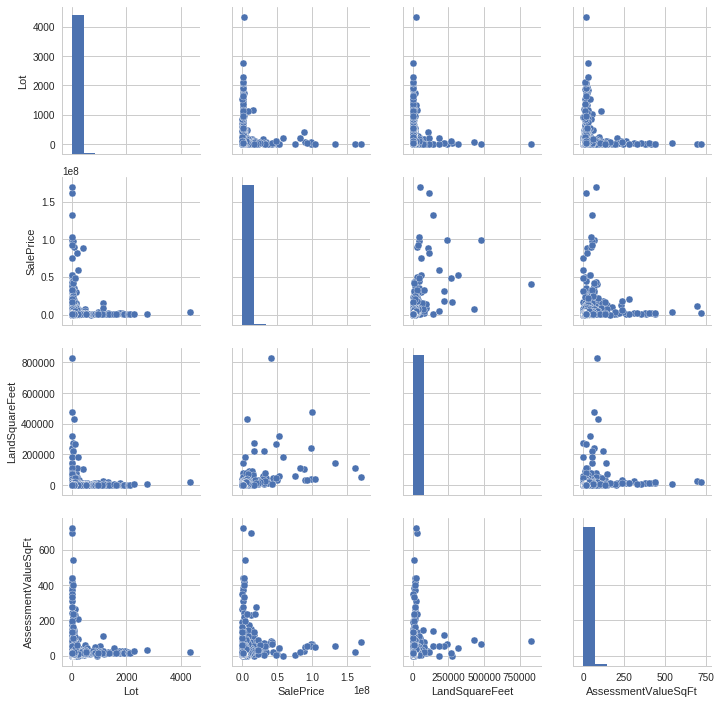

In [24]:
sns.pairplot(NYC_Sales, vars = ["Lot", "SalePrice", "LandSquareFeet", "AssessmentValueSqFt"])

In [25]:
tips = sns.load_dataset("tips")
tips.sample()

,total_bill,tip,sex,smoker,day,time,size
46,22.23,5.0,Male,No,Sun,Dinner,2


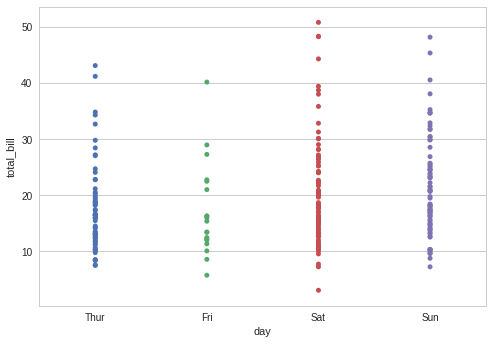

In [26]:
sns.stripplot(x="day", y="total_bill", data=tips)

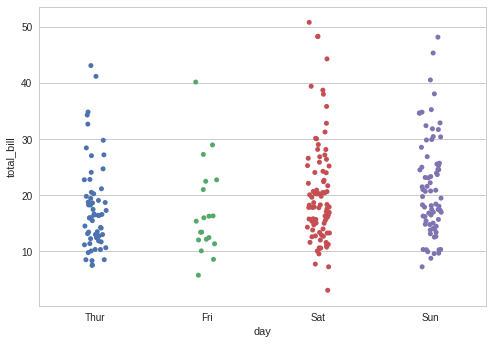

In [27]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)

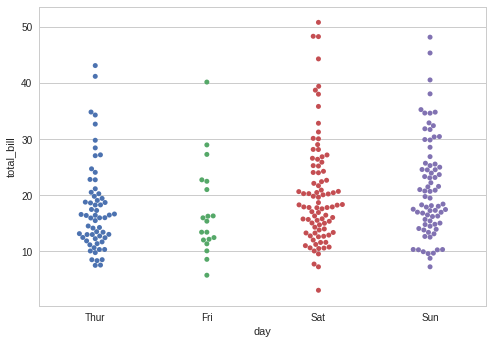

In [28]:
sns.swarmplot(x="day", y="total_bill", data=tips)

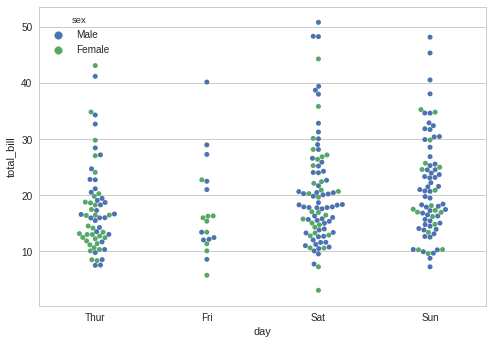

In [29]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips)

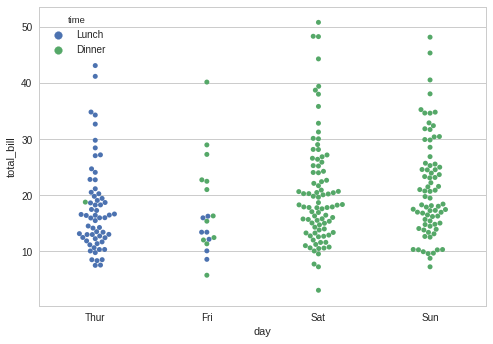

In [30]:
sns.swarmplot(x="day", y="total_bill", hue="time", data=tips)

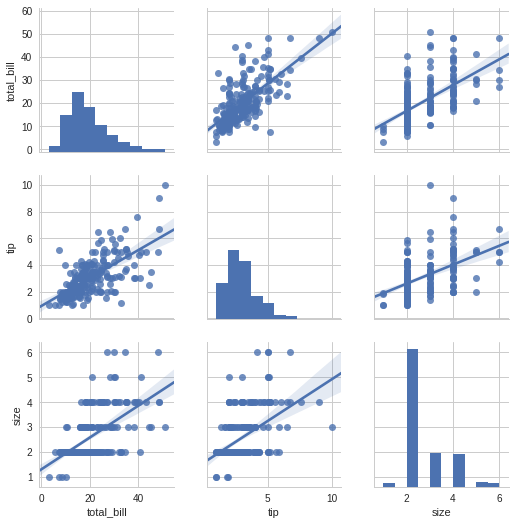

In [31]:
sns.pairplot(data=tips, kind="reg")

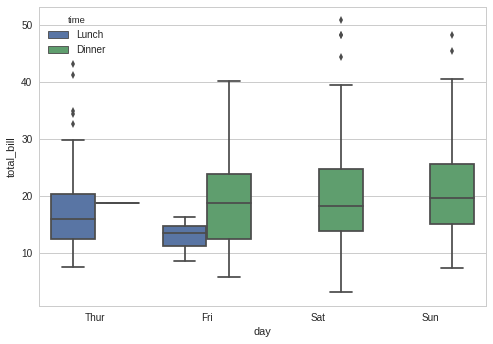

In [32]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

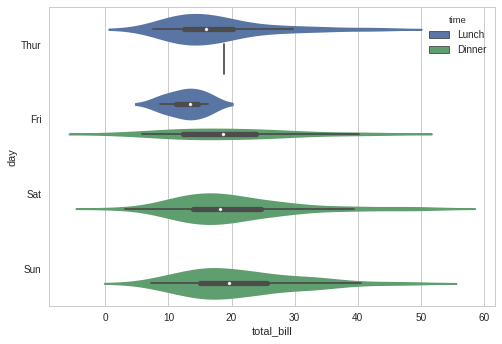

In [33]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips);

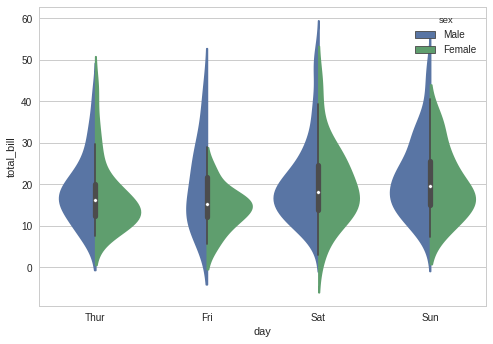

In [34]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True)

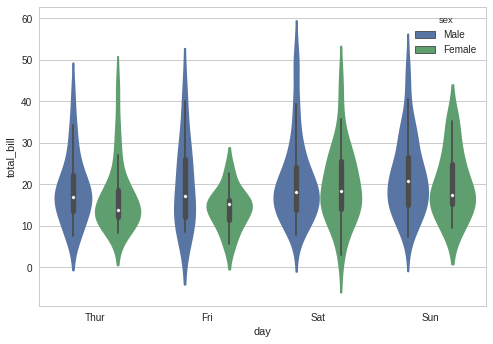

In [35]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips)

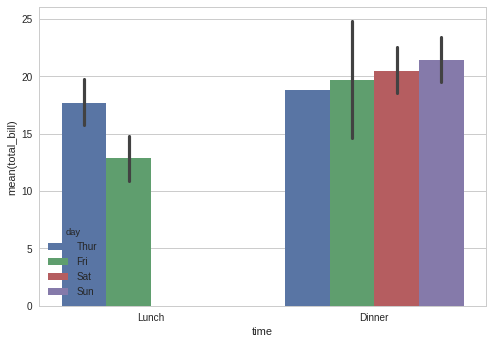

In [36]:
sns.barplot(x="time", y="total_bill", hue="day", data=tips);

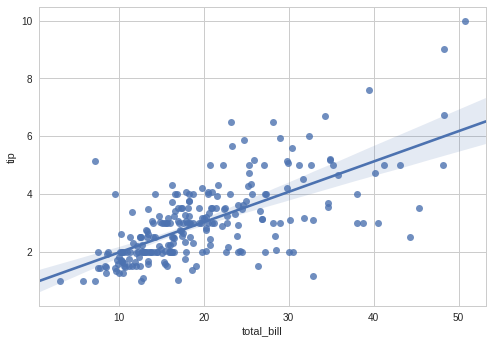

In [37]:
## Show best fit, as well as 95% confidence interval for the regression
sns.regplot(x="total_bill", y="tip", data=tips)

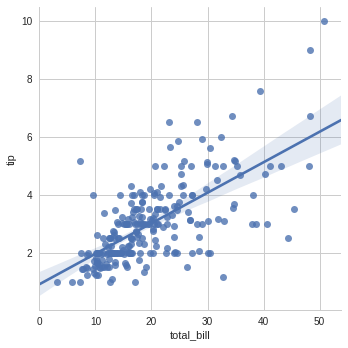

In [38]:
sns.lmplot(x="total_bill", y="tip", data=tips)

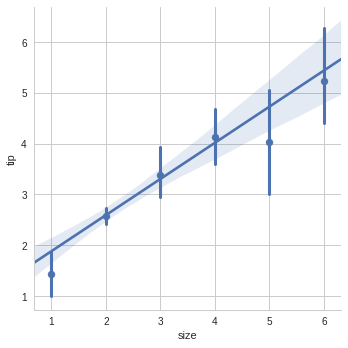

In [39]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean)

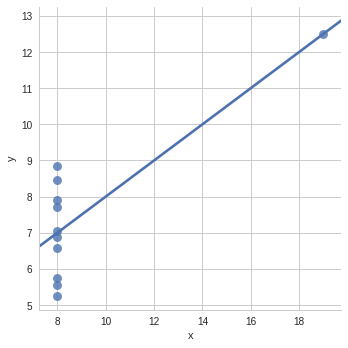

In [40]:
anscombe = sns.load_dataset("anscombe")
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'IV'"),
           ci=None, scatter_kws={"s": 80})

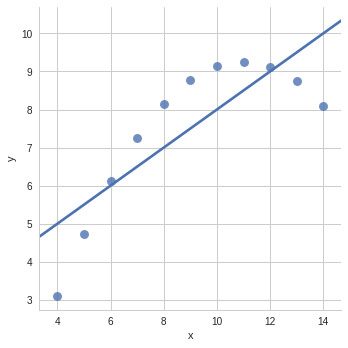

In [41]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), ci=None, scatter_kws={"s": 80})

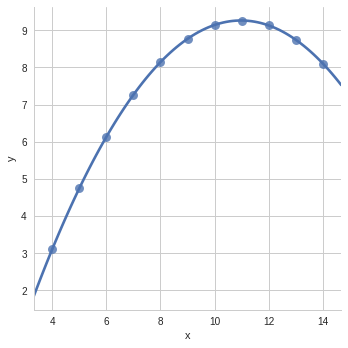

In [42]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80})

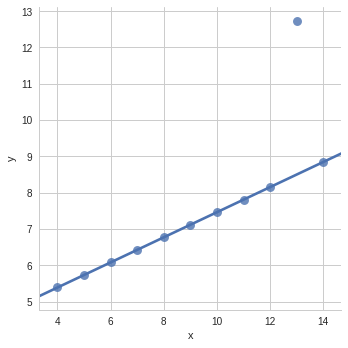

In [43]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

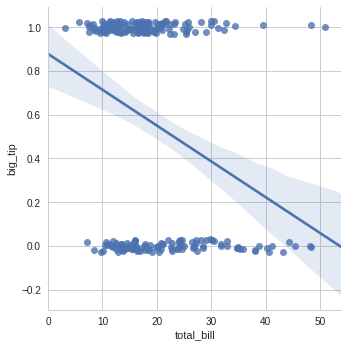

In [44]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

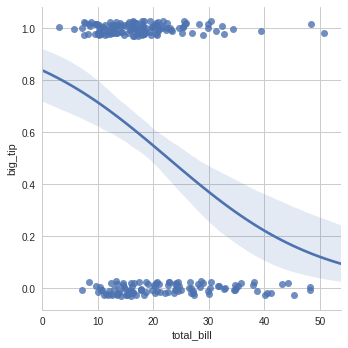

In [45]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

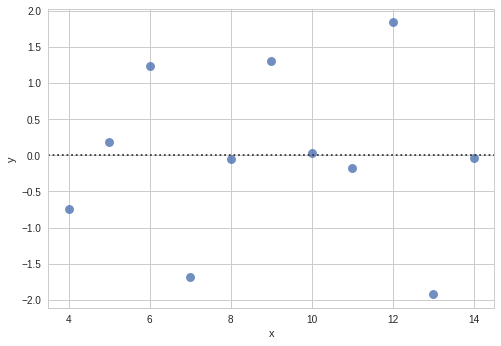

In [46]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

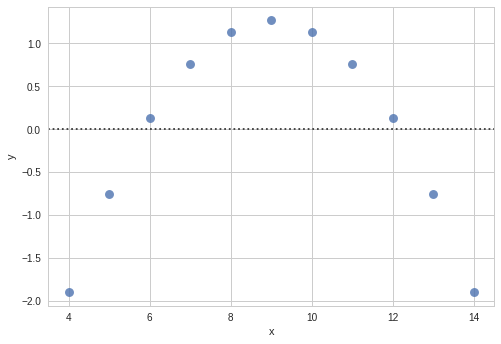

In [47]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

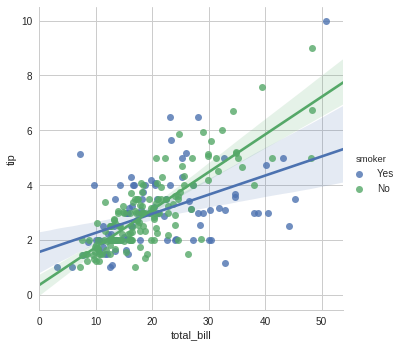

In [48]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

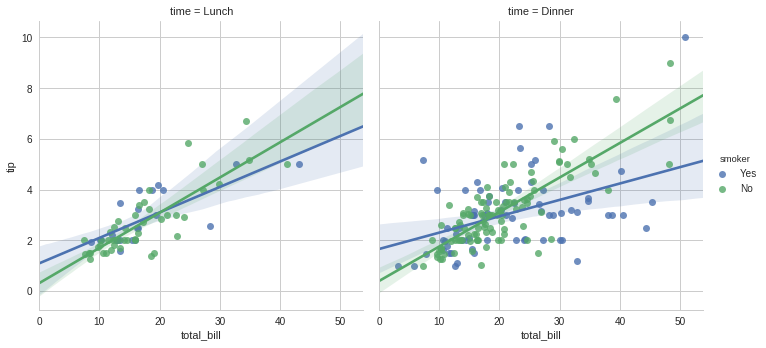

In [49]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

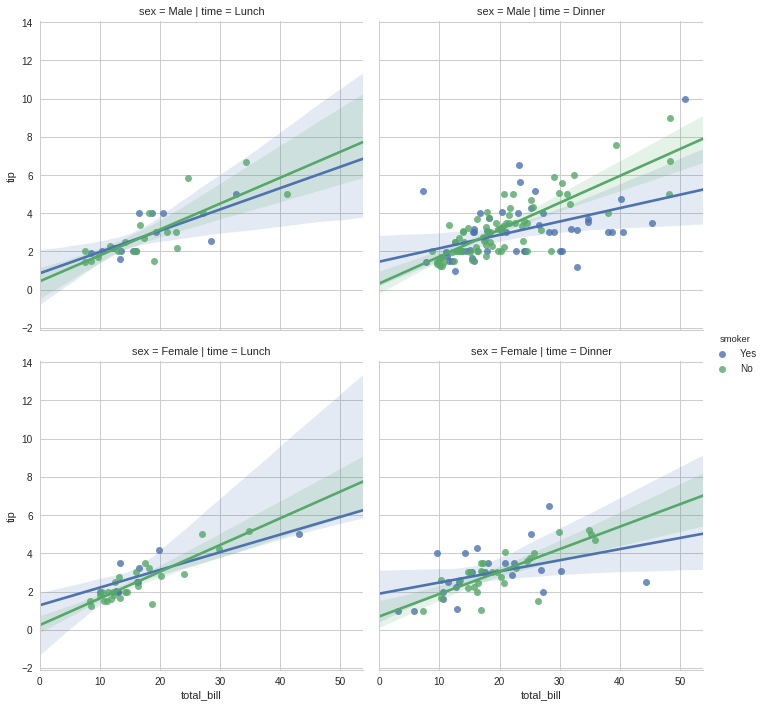

In [50]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);